In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerTuple
import numpy as np

In [173]:
modularity_data_path = '/Users/jk1/temp/resilience_part2/data_for_plots/10_23/delta_mod_avg_for_fig.xlsx'
eglob_data_path = '/Users/jk1/temp/resilience_part2/data_for_plots/10_23/delta_eglob_avg_for_fig.xlsx'

subj_avg_modularity_data_path = '/Users/jk1/temp/resilience_part2/data_for_plots/10_23/subj_avg_delta_mod_for_fig.xlsx'
subj_avg_eglob_data_path = '/Users/jk1/temp/resilience_part2/data_for_plots/10_23/subj_avg_delta_eglob_for_fig.xlsx'

In [208]:
modularity_data = pd.read_excel(modularity_data_path)
eglob_data = pd.read_excel(eglob_data_path)

subj_avg_modularity_data = pd.read_excel(subj_avg_modularity_data_path)
subj_avg_eglob_data = pd.read_excel(subj_avg_eglob_data_path)

## Modularity plot

In [218]:
modularity_data = modularity_data.melt(var_name='time_group', value_name='delta_modularity')
# add group column, if time_group starts with 'C' then group is 'control', else 'patient'
modularity_data['group'] = modularity_data['time_group'].apply(lambda x: 'control' if x.startswith('C') else 'patient')

Text(0.5, 1.0, 'Normalised delta modularity (mean +/- se)')

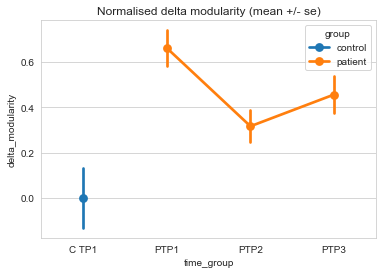

In [176]:
ax = sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="group", 
              estimator='mean', errorbar='se')

# set title
ax.set_title('Normalised delta modularity (mean +/- se)')

In [219]:
subj_avg_modularity_data = subj_avg_modularity_data.melt(var_name='time_group', value_name='delta_modularity')
# add group column, if time_group starts with 'C' then group is 'control', else 'patient'
subj_avg_modularity_data['group'] = subj_avg_modularity_data['time_group'].apply(lambda x: 'control' if x.startswith('C') else 'patient')

<AxesSubplot:xlabel='delta_modularity', ylabel='Density'>

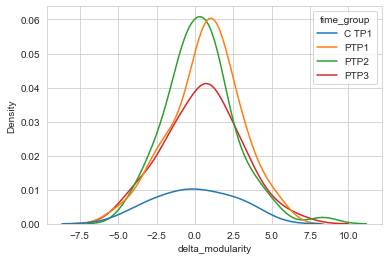

In [178]:
sns.kdeplot(data=subj_avg_modularity_data, x="delta_modularity", hue="time_group")

<ipython-input-228-940b79f19745>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='x-large')


Text(0.5, 1.0, 'Normalised delta modularity (mean +/- se)')

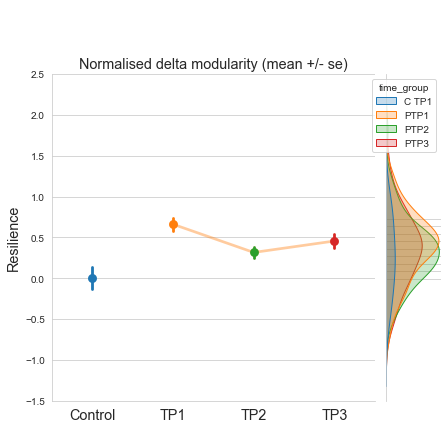

In [228]:
# sns joint grid with main plot point plot and marginals kde plots
g = sns.JointGrid()
ax1 = g.ax_joint

# plot modularity
sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="group", 
              estimator='mean', errorbar='se', legend=False, ax=ax1, alpha=0.4)

# modify color of modularity for patients
sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="time_group", 
              estimator='mean', errorbar='se', legend=False, ax=ax1)

ax1.set_ylabel('Resilience', fontsize='x-large')
ax1.set_xlabel('')

ax1.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='x-large')

# remove right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# plot kde for modularity on marg y
sns.kdeplot(data=subj_avg_modularity_data, y="delta_modularity", hue="time_group", fill=True, ax=g.ax_marg_y)

# detach units of ax1 and ax_marg_y
ax1.get_shared_y_axes().remove(g.ax_marg_y)

# remove top marginal plot
g.ax_marg_x.set_axis_off()

ax1.set_ylim(-1.5, 2.5)

ax1.set_title('Normalised delta modularity (mean +/- se)', fontsize='x-large')

<ipython-input-191-86ee9695a2fa>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='large')


Text(0.5, 1.0, 'Normalised delta modularity (mean +/- se)')

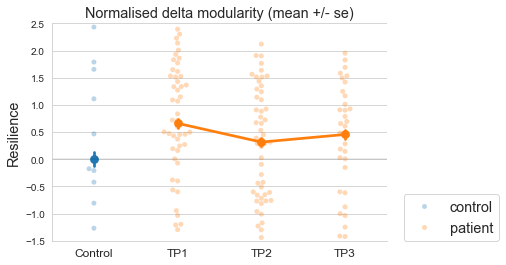

In [191]:
ax1 = plt.subplot(111)

sns.swarmplot(data=subj_avg_modularity_data, x="time_group", y="delta_modularity", hue="group", 
            ax=ax1, alpha=0.3)

# plot modularity
sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="group", 
              estimator='mean', errorbar='se', legend=False, ax=ax1)


ax1.set_ylabel('Resilience', fontsize='x-large')
ax1.set_xlabel('')

ax1.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='large')

# remove right and top spines
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# set horizontal bar at 0 thicker
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.15)

ax1.set_ylim(-1.5, 2.5)

# set legend outside on bottom right
ax1.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., fontsize='x-large')

ax1.set_title('Normalised delta modularity (mean +/- se)', fontsize='x-large')

## Eglob plot

In [209]:
eglob_data = eglob_data.melt(var_name='time_group', value_name='delta_eglob')
# add group column, if time_group starts with 'C' then group is 'control', else 'patient'
eglob_data['group'] = eglob_data['time_group'].apply(lambda x: 'control' if x.startswith('C') else 'patient')

Text(0.5, 1.0, 'Normalised delta eglob (mean +/- se)')

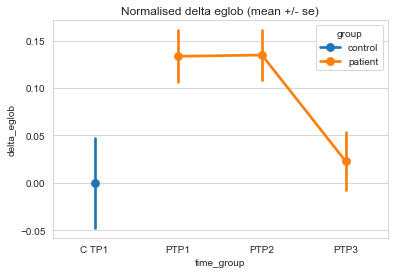

In [210]:
ax2 = sns.pointplot(data=eglob_data, x="time_group", y="delta_eglob", hue="group", 
              estimator='mean', errorbar='se')

# set title
ax2.set_title('Normalised delta eglob (mean +/- se)')

In [211]:
subj_avg_eglob_data = subj_avg_eglob_data.melt(var_name='time_group', value_name='delta_eglob')
# add group column, if time_group starts with 'C' then group is 'control', else 'patient'
subj_avg_eglob_data['group'] = subj_avg_eglob_data['time_group'].apply(lambda x: 'control' if x.startswith('C') else 'patient')

<ipython-input-217-740bc1ad9cf6>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='large')


Text(0.5, 1.0, 'Normalised delta Eglob (mean +/- se)')

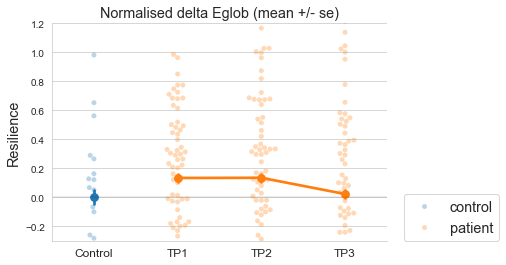

In [217]:
ax5 = plt.subplot(111)

sns.swarmplot(data=subj_avg_eglob_data, x="time_group", y="delta_eglob", hue="group", 
            ax=ax5, alpha=0.3)

# plot modularity
sns.pointplot(data=eglob_data, x="time_group", y="delta_eglob", hue="group", 
              estimator='mean', errorbar='se', legend=False, ax=ax5)


ax5.set_ylabel('Resilience', fontsize='x-large')
ax5.set_xlabel('')

ax5.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'], fontsize='large')

# remove right and top spines
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)

# set horizontal bar at 0 thicker
ax5.axhline(y=0, color='k', linestyle='-', linewidth=0.15)

ax5.set_ylim(-0.3, 1.2)

# set legend outside on bottom right
ax5.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0., fontsize='x-large')

ax5.set_title('Normalised delta Eglob (mean +/- se)', fontsize='x-large')

## Joint Eglob and Modularity plot

In [71]:
# palette for patients
mod_patient_palette = sns.color_palette("Oranges", 1)
eglob_patient_palette = sns.color_palette("Greens", 1)

# palette for controls
control_palette = sns.color_palette("Blues", 2)

# modularity palette is 4 colors (1 control + 3 patients)
mod_palette = control_palette[:1] + mod_patient_palette
# eglob palette is 4 colors (1 control + 3 patients)
eglob_palette = control_palette[1:] + eglob_patient_palette

<ipython-input-120-a9e1361bf717>:11: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="group",
<ipython-input-120-a9e1361bf717>:22: UserWarning: The palette list has more values (3) than needed (1), which may not be intended.
  sns.pointplot(data=eglob_data[eglob_data.group == 'patient'], x="time_group", y="delta_eglob", hue="group",
<ipython-input-120-a9e1361bf717>:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'])


AttributeError: 'Rectangle' object has no property 'shade'

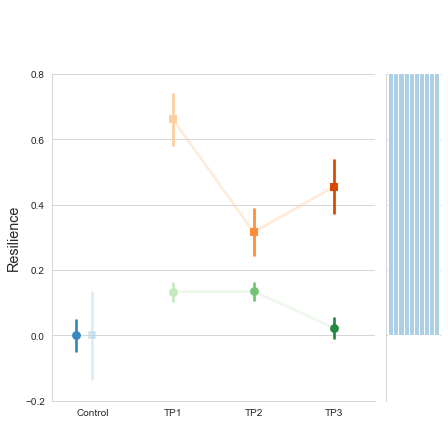

In [120]:
# let figure size be 10x10
# fig = plt.figure(figsize=(7.5, 7.5))
# ax3 = fig.add_subplot(111)

g = sns.JointGrid()
ax3 = g.ax_joint

plot_legend = False

# plot modularity
sns.pointplot(data=modularity_data, x="time_group", y="delta_modularity", hue="group", 
              estimator='mean', errorbar='se', palette=mod_palette, legend=False, ax=ax3, alpha=0.4,
              marker='s')

# modify color of modularity for patients
mod_patient_palette = sns.color_palette("Oranges", 3)
sns.pointplot(data=modularity_data[modularity_data.group == 'patient'], x="time_group", y="delta_modularity", hue="time_group", 
              estimator='mean', errorbar='se', palette=mod_patient_palette, legend=False, ax=ax3,
              marker='s')

# plot eglob
sns.pointplot(data=eglob_data[eglob_data.group == 'patient'], x="time_group", y="delta_eglob", hue="group", 
              estimator='mean', errorbar='se', palette=eglob_patient_palette, alpha=0.3,
              ax=ax3, legend=False)

# modify color of eglob for patients
eglob_patient_palette = sns.color_palette("Greens", 3)
sns.pointplot(data=eglob_data[eglob_data.group == 'patient'], x="time_group", y="delta_eglob", hue="time_group", 
              estimator='mean', errorbar='se', palette=eglob_patient_palette, legend=False, ax=ax3)

# plot control eglob
# create palette with 4 colors (1 control + 3 patients), where last 3 are with alpha=0
temp_palette = sns.color_palette("Blues", 4)
temp_palette = control_palette[1:] + [(r, g, b, 0) for r, g, b in temp_palette[1:]]
sns.pointplot(data=eglob_data, x="time_group", y="delta_eglob", dodge=0.4, hue="time_group", 
              estimator='mean', errorbar='se', legend=False, ax=ax3, palette=temp_palette)

ax3.set_ylim(-0.2, 0.8)

ax3.set_ylabel('Resilience', fontsize='x-large')
ax3.set_xlabel('')

ax3.set_xticklabels(['Control', 'TP1', 'TP2', 'TP3'])


# remove right and top spines
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

# add legend
if plot_legend:
    # 4 handles for modularity (diamond, 1 control + 3 patients)
    mod_palette = control_palette[:1] + mod_patient_palette
    mod_handles = tuple([plt.Line2D([0,0],[0,0],color=mod_palette[i], marker='s') for i in range(4)])
    mod_legend = 'Modularity'
    # 4 handles for eglob (circle, 1 control + 3 patients)
    eglob_palette = control_palette[1:] + eglob_patient_palette
    eglob_handles = tuple([plt.Line2D([0,0],[0,0],color=eglob_palette[i], marker='o') for i in range(4)])
    eglob_legend = 'Eglob'
    
    # place legend outside lower right corner
    ax3.legend([mod_handles, eglob_handles], [mod_legend, eglob_legend], 
          handler_map={tuple: HandlerTuple(ndivide=None)},
            bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.,
           fontsize='x-large')
            
g.ax_marg_x.set_axis_off()
# plot kde for modularity on marg y
g.ax_marg_y.hist(modularity_data[modularity_data.group == 'control'].delta_modularity, color=control_palette[0], shade=True, alpha=0.4)

    

(-1.5, 1.5)

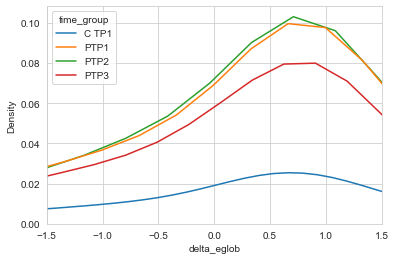

In [124]:
ax4 = sns.kdeplot(data=eglob_data, x="delta_eglob", hue="time_group")
ax4.set_xlim(-1.5, 1.5)